In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
import cv2 as cv

In [10]:
def getTask1Ksi(N, LAMBDA, BINS):
    data = np.random.uniform(0, 1, N)
    data = - (1 / LAMBDA) * np.log(data)
    output = plt.hist(data, bins=BINS)
    values, edges, _ = output
    F = 1 - np.exp(- LAMBDA * edges)
    estimate = N * (F[1:] - F[:-1])
    ksi = np.sum(((values - estimate) ** 2) / estimate)
    mean, var = np.mean(data), np.var(data)
    return ksi, mean, var

In [11]:
def getTask2Ksi(N, A, SIGMA, BINS):
    data = np.random.uniform(0, 1, (N, 12)).sum(axis = 1)
    data = (data - 6) * SIGMA + A
    output = plt.hist(data, bins=BINS)
    values, edges, _ = output
    F = 0.5 * (1 + erf((edges - A) / (SIGMA * np.sqrt(2))))
    estimate = N * (F[1:] - F[:-1])
    ksi = np.sum(((values - estimate) ** 2) / estimate)
    mean, var = np.mean(data), np.var(data)
    return ksi, mean, var

In [12]:
def getTask3Ksi(N, START, A, C, BINS):
    prevZ = START
    data = []
    for i in range(N):
        Z = (A * prevZ) % C
        data.append(Z / C)
        prevZ = Z
    data = np.array(data)
    output = plt.hist(data, bins=BINS)
    values, edges, _ = output
    estimate = N * (edges[1:] - edges[:-1])
    ksi = np.sum(((values - estimate) ** 2) / estimate)
    mean, var = np.mean(data), np.var(data)
    return ksi, mean, var

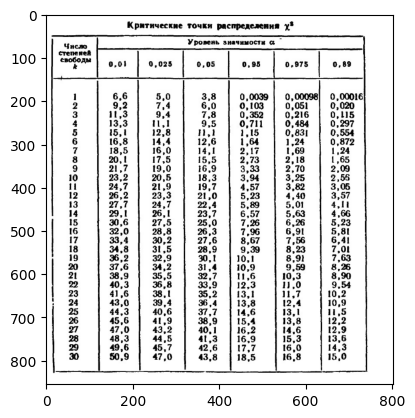

In [13]:
image = cv.cvtColor(cv.imread('table.jpg'), cv.COLOR_BGR2RGB)
plt.imshow(image)

CHI =  21.804905850802758     mean = 0.09934199563360681     var = 0.009449278688737546
Should be: mean,  0.1     var = 0.01


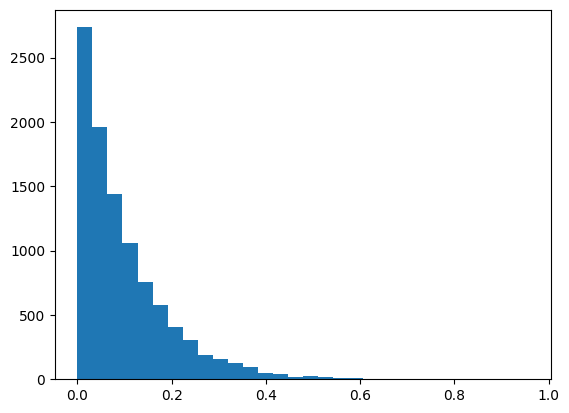

In [14]:
LAMBDA = 10
ksi, mean, var = getTask1Ksi(10_000, LAMBDA, 30)
print("CHI = ", ksi, "    mean =", mean, "    var =", var)
print("Should be: mean, ", 1 / LAMBDA, "    var =", 1 / LAMBDA ** 2)

CHI =  37.93158358739999     mean = 0.9293629365646355     var = 100.48829988070649
Should be: mean =  1     var = 100


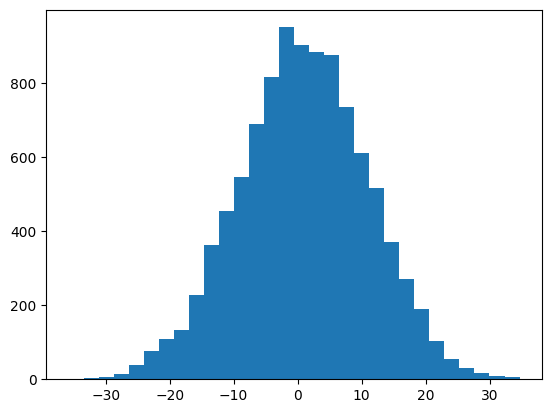

In [15]:
A = 1
SIGMA = 10
ksi, mean, var = getTask2Ksi(10_000, A, SIGMA, 30)
print("CHI = ", ksi, "    mean =", mean, "    var =", var)
print("Should be: mean = ", A, "    var =", SIGMA ** 2)

CHI =  34.124057615815516     mean = 0.49952963258353683     var = 0.08468452396481467
Should be: mean =  0.5     var = 0.08333333333333333


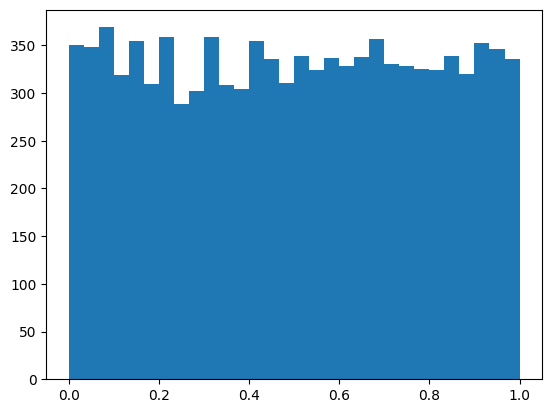

In [16]:
ksi, mean, var = getTask3Ksi(10_000, 31, 4**13, 13**33, 30)
print("CHI = ", ksi, "    mean =", mean, "    var =", var)
print("Should be: mean = ", 0.5, "    var =", 1 / 12)